# 4.6 Linear Algebra

Again, will need to review linear algebra in general to make full use of this.

Matrix multiplication is different from regular multiplication - so using `*` to multiply arrays gives an element-wise product, while `dot` or `@` give the matrix multiplication result.

Linear algebra operations:

1. Matrix multiplication
1. Decompositions
1. Determinants
1. Square matrix math


`dot` is a method of arrays and also a numpy function.

Import other functions, like inverse (`inv`) and determinant (`qr`) from `numpy.linalg`

In [1]:
import numpy as np

# Make two 2-d arrays
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print("\n")
print(y)

[[1. 2. 3.]
 [4. 5. 6.]]


[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


In [2]:
# Dot product - using the array method
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [3]:
# Dot product - using numpy.dot
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [6]:
# Multiplying 2-d array by a 1-d array will return a 1-d array
ones = np.ones(3)
ones

x @ ones

array([ 6., 15.])

In [7]:
x.dot(ones)

array([ 6., 15.])

In [9]:
from numpy.linalg import inv, qr
rng = np.random.default_rng(seed=12345)

# Matrix
X = rng.standard_normal((5, 5))
X

array([[-1.42382504,  1.26372846, -0.87066174, -0.25917323, -0.07534331],
       [-0.74088465, -1.3677927 ,  0.6488928 ,  0.36105811, -1.95286306],
       [ 2.34740965,  0.96849691, -0.75938718,  0.90219827, -0.46695317],
       [-0.06068952,  0.78884434, -1.25666813,  0.57585751,  1.39897899],
       [ 1.32229806, -0.29969852,  0.90291934, -1.62158273, -0.15818926]])

In [10]:
mat1 = X.T @ X
mat1

array([[ 9.83867527,  1.04334204,  0.24651754,  0.04017965,  0.16391486],
       [ 1.04334204,  5.11794735, -3.98521413,  0.99264687,  3.27464142],
       [ 0.24651754, -3.98521413,  4.15026075, -2.41299778, -2.74788646],
       [ 0.04017965,  0.99264687, -2.41299778,  3.97263789, -0.04472489],
       [ 0.16391486,  3.27464142, -2.74788646, -0.04472489,  6.01956209]])

In [12]:
mat2 = X.T.dot(X)
mat2

array([[ 9.83867527,  1.04334204,  0.24651754,  0.04017965,  0.16391486],
       [ 1.04334204,  5.11794735, -3.98521413,  0.99264687,  3.27464142],
       [ 0.24651754, -3.98521413,  4.15026075, -2.41299778, -2.74788646],
       [ 0.04017965,  0.99264687, -2.41299778,  3.97263789, -0.04472489],
       [ 0.16391486,  3.27464142, -2.74788646, -0.04472489,  6.01956209]])

In [13]:
inv(mat1)

array([[ 0.15548538, -0.36723081, -0.52638547, -0.2300642 , -0.04646089],
       [-0.36723081,  2.54917814,  3.47827334,  1.48196722,  0.22206454],
       [-0.52638547,  3.47827334,  5.46389554,  2.46214396,  0.63467543],
       [-0.2300642 ,  1.48196722,  2.46214396,  1.38302896,  0.33430132],
       [-0.04646089,  0.22206454,  0.63467543,  0.33430132,  0.33879566]])

In [14]:
mat1 @ inv(mat1)

array([[ 1.00000000e+00,  2.21850121e-16, -1.69485486e-16,
         1.69587246e-16, -1.96317601e-17],
       [ 1.60901152e-16,  1.00000000e+00,  9.88009619e-16,
        -6.00171811e-16, -4.67042211e-16],
       [-1.05685721e-16, -4.58539906e-16,  1.00000000e+00,
        -5.98139876e-17,  3.00070289e-16],
       [-2.38572202e-16,  9.90852676e-16,  2.03861339e-15,
         1.00000000e+00,  3.28769669e-16],
       [-1.60460765e-20, -4.35123959e-16,  8.16184502e-16,
        -3.70787804e-16,  1.00000000e+00]])

<img src="./myImages/table4.8_linalgFunctions.png" size = 600>

# 4.7 Random Walks

[Random walks](https://en.wikipedia.org/wiki/Random_walk) are stochastic processes that describe a path that consists of a succession of random steps on some mathematical space.  

Basic example is the random walk on the "integer number line Z" which starts at 0 and at each step moves either +1 or -1 with equal probability.  

Implement a 1000-step random walk of the above example in pure Python with the built-in `random` module:

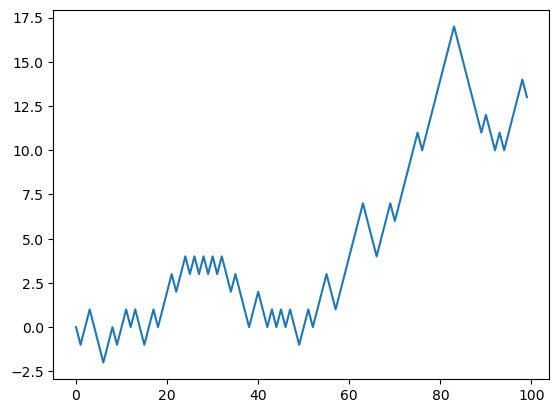

In [16]:
import random
import matplotlib.pyplot as plt

# Random Walk
position = 0                                         # Set starting position
nsteps = 1000                                        # Set number of steps to take
walk = [position]                                    # Initialize a list starting with the starting position
for _ in range(nsteps):                              # For loop for 1000 iterations. (I forget what _ is for)
    step = 1 if random.randint(0, 1) else -1         # simple if-else to determine step direction
    position += step                                 # Update position based on this step
    walk.append(position)                            # Append current position to the record list
    
# Plot it
plt.plot(walk[:100])

Notice how `walk` is a cumulative sum of all the steps. Try to do the same with arrays:

In [26]:
nsteps = 1000                                        # Set number of steps to take
rng = np.random.default_rng(seed=12345)              # fresh random generator
draws = rng.integers(0, 2, size=nsteps)              # Create array of length 1000 of either 0 or 1 (use 2 b/c second value is exclusive)
steps = np.where(draws == 0, 1, -1)                  # Use where to map conditional 
walk = steps.cumsum()                                # Calc walk

In [19]:
# Min walk
walk.min()

-8

In [20]:
# Max walk
walk.max()

50

Another statistic is first crossing time  - the first step at which the random walk reaches a particular value

For example, how long to get 10 steps away from 0 in either direction?

In [ ]:
# Boolean array of every walk position 10 steps or further from 0
np.abs(walk) >= 10

In [22]:
# argmax returns the first instance of the maximum value in an array (True is max value in a boolean array)
# Again have to wrap in () to use the method
(np.abs(walk) >= 10).argmax()

155

## Simulating Many Random Walks at Once

How to do the above 5000 times?

`numpy.random` functions will generate 2-d arrays of draws if passed a 2-tuple

In [27]:
nsteps = 1000                                        # Set number of steps to take
nwalks = 5000                                        # Set number of walks to simulate
draws = rng.integers(0, 2, size=(nwalks, nsteps))    # provide a 2-tuple to size instead of 1 value (will have axis0 (rows) = 5000 and axis1 (columns) = 1000)
steps = np.where(draws > 0, 1, -1)                   # Use where to map conditional 
walks = steps.cumsum(axis = 1)                       # Calculate the cumsum BY ROW, so for each of the 5000 rows, will get the cumulative sum of the 1000 steps
print(walks.shape)
walks

(5000, 1000)


array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

In [28]:
# Now using max and min will get the maximum and minimum values across all 5000 walks:
walks.max()

114

In [29]:
walks.min()

-120

Calculate the minimum crossing time to +/- 30.

Not all of them will reach 30, so have to do some trickery.

First, get indices of each of the 5000 walks that hit 30:

In [31]:
# Oneliner that accomplishes it:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30.sum()

3395

Break it down:

In [32]:
# Boolean array of which positions in each walk is greater than abs(30)
bool30 = np.abs(walks) >= 30 
bool30.shape

(5000, 1000)

In [34]:
# Use any across the rows to grab which of the 5000 have atleast 1 true!
# See how it gets reduced to a 1-d array now.
hits30 = bool30.any(axis=1)
print(hits30)
hits30.sum()

[False  True  True ...  True False  True]


3395

Now we know that 3,395 of the walks hit 30. We want the crossing times for each of these walks.  

So we have to do the same comparison as above, but with the hits only

In [35]:
# One-liner
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541])

In [41]:
### Broken down:

# This is same as bool30 creation above, but only returns the results for the 3395 hits.
hits30bool = np.abs(walks[hits30]) >= 30
print(hits30bool.shape)

# Now, instead of using any to find hits, we use argmax to find crossing times
crossing_times = hits30bool.argmax(axis = 1)
crossing_times

(3395, 1000)


array([201, 491, 283, ..., 219, 259, 541])

Now that we have all of the crossing times, we can get the average:

In [42]:
crossing_times.mean()

500.5699558173785

What about if we didn't get the hits first?  
Below I get an array of length 5000. All of the non-zero values will be the same as above.  
Issue here, though, is that if I calculate the average, it will be smaller b/c it's out of 5000

In [43]:
foo = (np.abs(walks) >= 30).argmax(axis=1)
foo

array([  0, 201, 491, ..., 259,   0, 541])

In [44]:
foo.mean()

339.887

But we could just subset it to get the right mean:

In [45]:
(foo[foo != 0]).mean()

500.5699558173785